In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon, LineString, MultiPoint, MultiLineString, MultiPolygon

<Axes: >

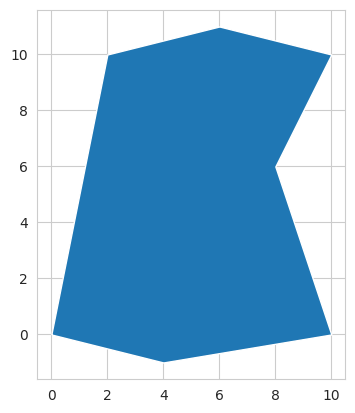

In [2]:
# polygon from boundaries
boundaries = Polygon([(0, 0), (2, 10), (6, 11), (10, 10), (8, 6), (10, 0), (4, -1)])
# create a GeoDataFrame
boundaries_gdf = gpd.GeoDataFrame(geometry=[boundaries])
boundaries_gdf.plot()

<Axes: >

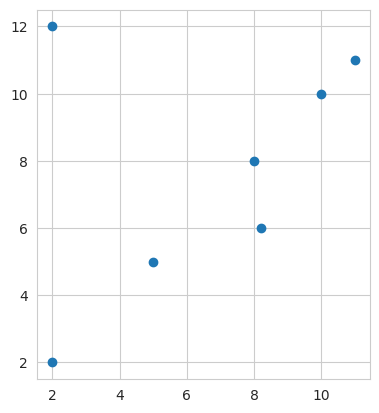

In [3]:
# some points
point1 = Point(2, 2)
point2 = Point(8, 8)
point3 = Point(5, 5)
point4 = Point(2, 12)
point5 = Point(10, 10)
point6 = Point(11, 11)
point7 = Point(8.2, 6)
# create a GeoDataFrame
points_gdf = gpd.GeoDataFrame(geometry=[point1, point2, point3, point4, point5, point6, point7])
# add the name of the points
points_gdf['name'] = ['point1', 'point2', 'point3', 'point4', 'point5', 'point6', 'point7']
points_gdf.plot()

<Axes: >

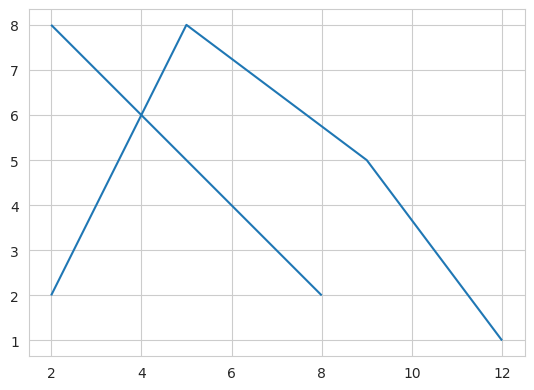

In [4]:
# some lines
road1 = LineString([(2, 2), (5, 8), (9, 5), (12, 1)])
road2 = LineString([(2, 8), (8, 2)])
# create a GeoDataFrame
roads_gdf = gpd.GeoDataFrame(geometry=[road1, road2])
# add the name of the roads
roads_gdf['name'] = ['road1', 'road2']

roads_gdf.plot()

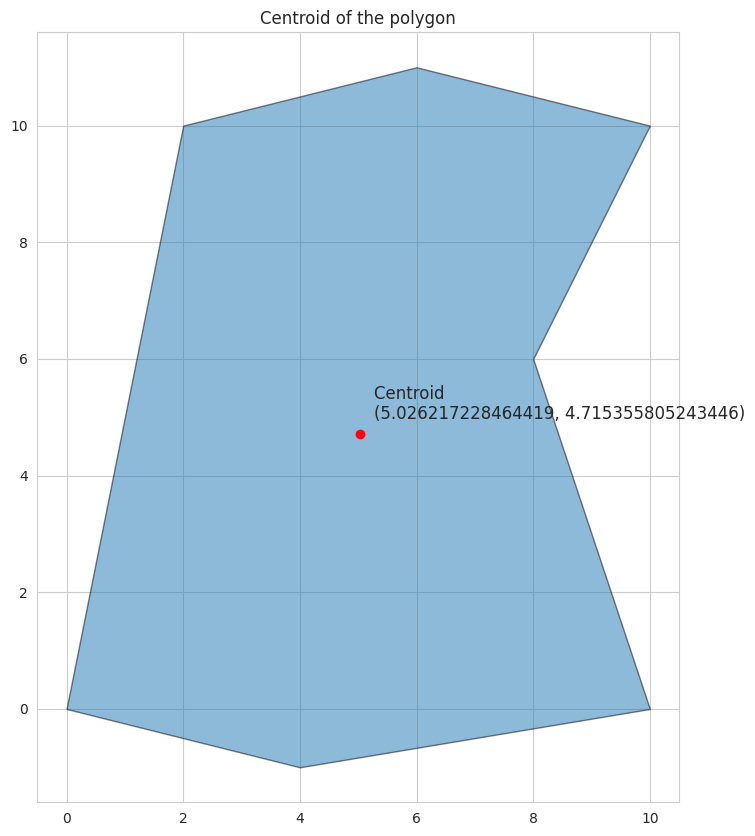

In [5]:
# plot the centroid of the polygon
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
boundaries_gdf.centroid.plot(
    ax=ax,
    color='red'
)
# display the coordinates of the centroid
x, y = boundaries.centroid.x, boundaries.centroid.y
ax.text(x + .25, y + .25, f'Centroid \n({x}, {y})', fontsize=12)
# add a title
plt.title('Centroid of the polygon')
plt.show()

In [6]:
# show the area of the polygon
print(f'The area of the polygon is {boundaries.area} units')
# show it perimeter
print(f'The perimeter of the polygon is {boundaries.length} units')

The area of the polygon is 89.0 units
The perimeter of the polygon is 39.44680970967311 units


In [7]:
# let's see how to interact with points
# are there some points inside the polygon?
points_gdf.within(boundaries).sum()

3

In [8]:
# Maybe we can join the points that are within the polygon
gpd.sjoin(points_gdf, boundaries_gdf, predicate='within')

,geometry,name,index_right
0,POINT (2.00000 2.00000),point1,0
1,POINT (8.00000 8.00000),point2,0
2,POINT (5.00000 5.00000),point3,0


In [9]:
# Or maybe just get the points that are inside the polygon
gpd.overlay(points_gdf, boundaries_gdf, how='intersection')

,name,geometry
0,point1,POINT (2.00000 2.00000)
1,point2,POINT (8.00000 8.00000)
2,point3,POINT (5.00000 5.00000)
3,point5,POINT (10.00000 10.00000)


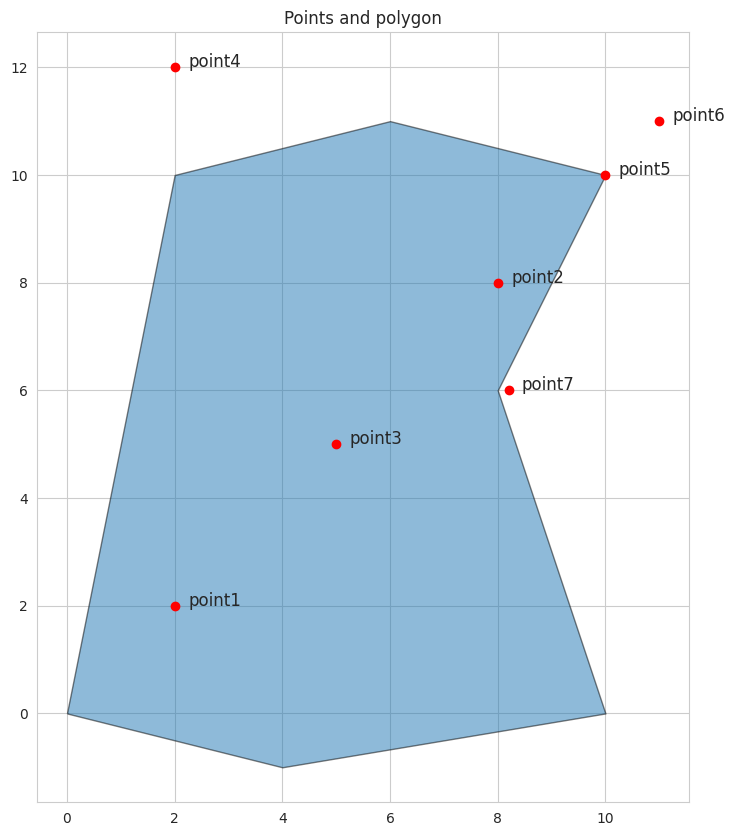

In [10]:
# Uh, that's not the same result
# Let's check why !
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
points_gdf.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points and polygon')
plt.show()

In [11]:
# It seems that the point5 is on the edge of the polygon

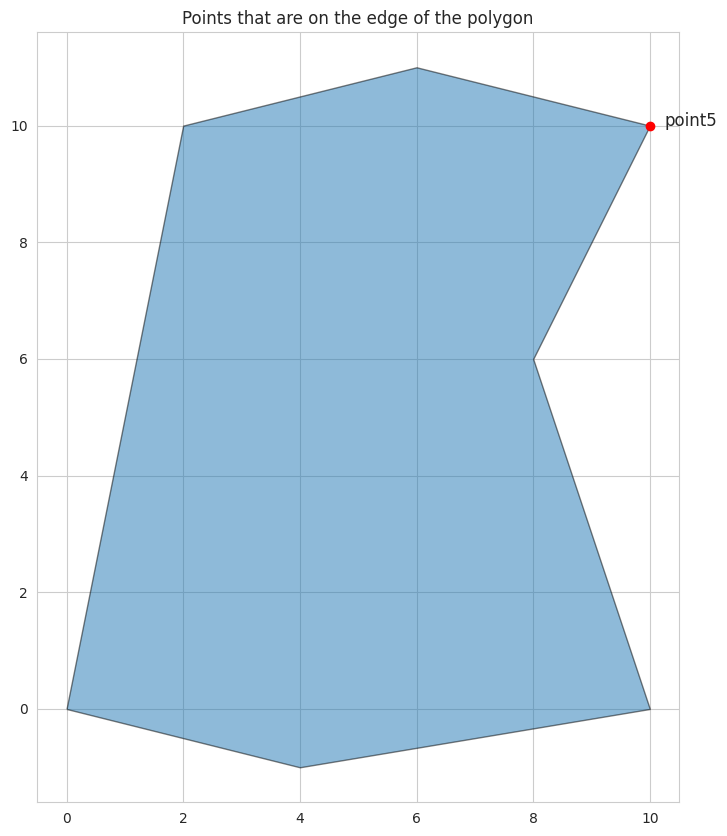

In [12]:
# show points that are on the edge of the polygon
mask = points_gdf.touches(boundaries)
touches = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
touches.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(touches.geometry.x, touches.geometry.y, touches['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are on the edge of the polygon')
plt.show()

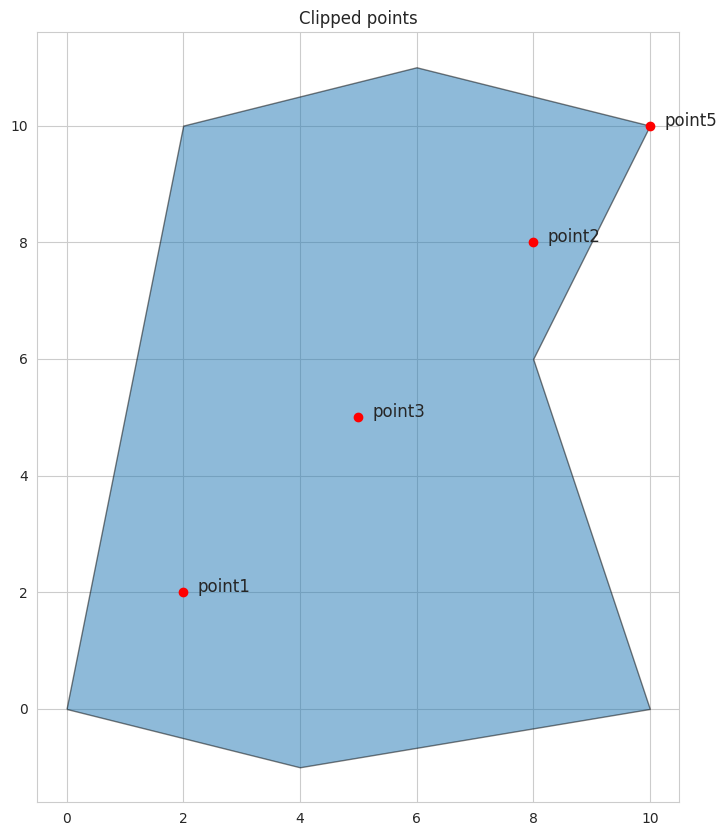

In [13]:
# What about clip ?
clipped = gpd.clip(points_gdf, boundaries_gdf)

fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
clipped.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(clipped.geometry.x, clipped.geometry.y, clipped['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Clipped points')
plt.show()

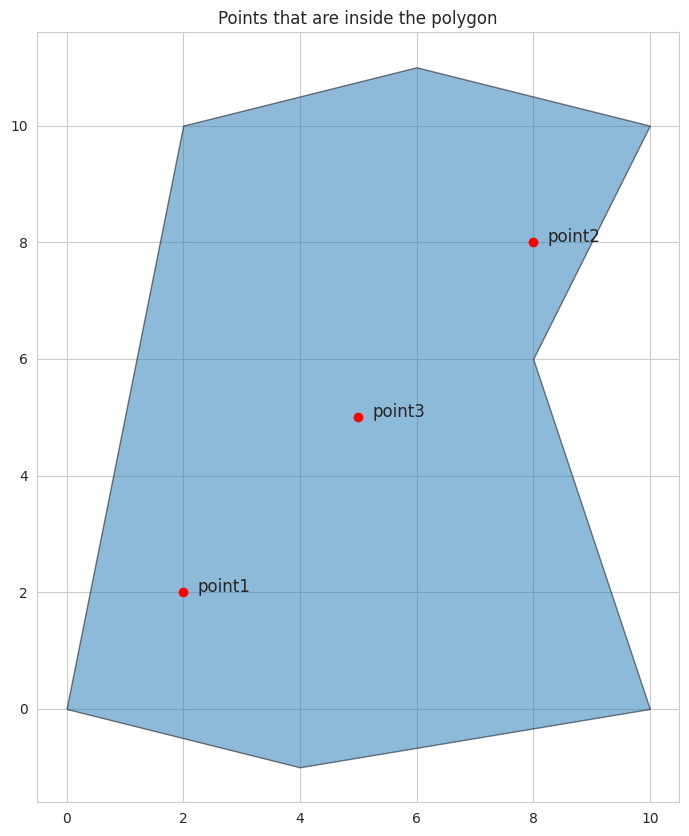

In [14]:
# points that are inside the polygon
mask = points_gdf.within(boundaries)
inside = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
inside.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(inside.geometry.x, inside.geometry.y, inside['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are inside the polygon')
plt.show()

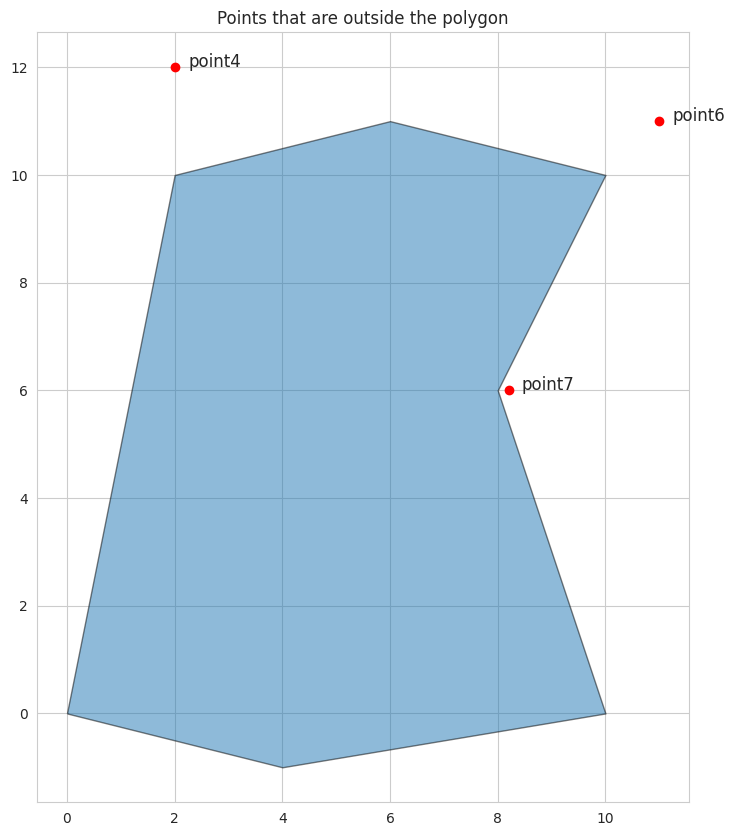

In [15]:
# what about those that are outside the polygon
mask = points_gdf.disjoint(boundaries)
outside = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
outside.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(outside.geometry.x, outside.geometry.y, outside['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are outside the polygon')
plt.show()

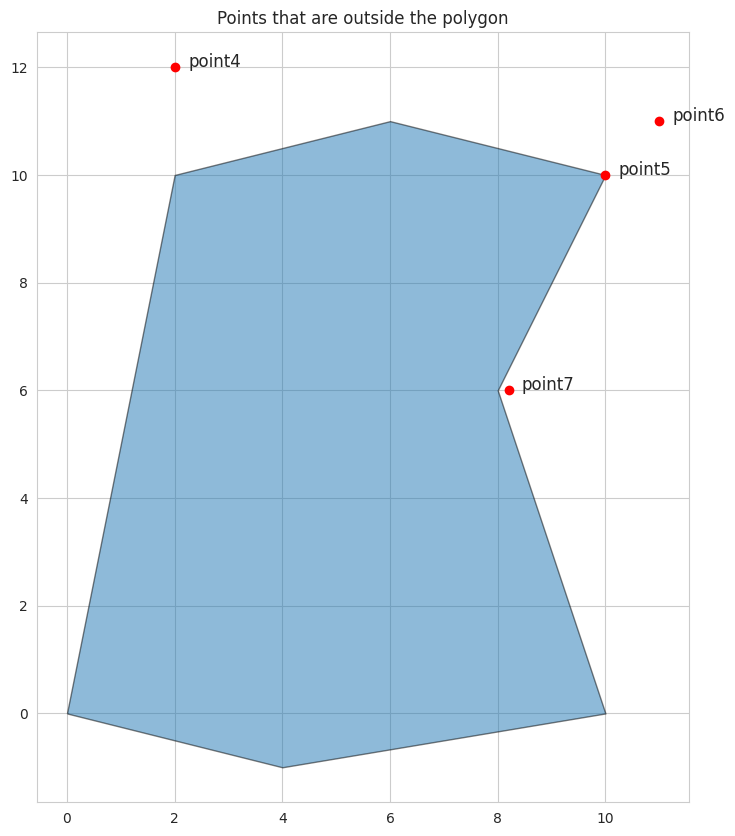

In [16]:
# what about the points that are NOT within the polygon
mask = ~points_gdf.within(boundaries)
outside = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
outside.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(outside.geometry.x, outside.geometry.y, outside['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are outside the polygon')
plt.show()

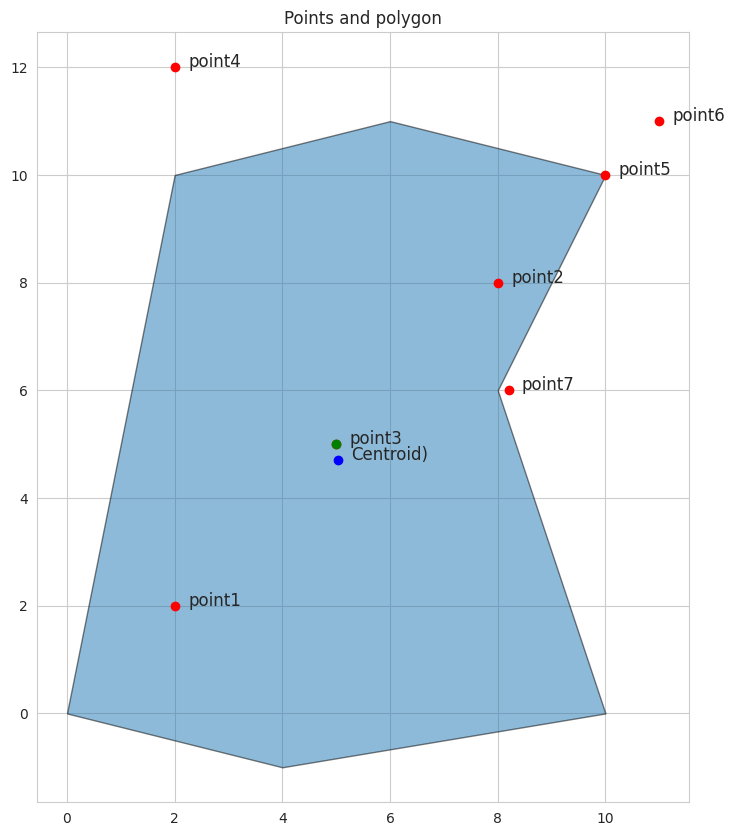

In [17]:
# get the point that is closest to the centroid of the polygon
distances = points_gdf.distance(boundaries.centroid)
closest = points_gdf[distances == distances.min()]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
points_gdf.plot(
    ax=ax,
    color='red'
)
closest.plot(
    ax=ax,
    color='green'
)
# plot the centroid
boundaries_gdf.centroid.plot(
    ax=ax,
    color='blue'
)
# add the name of the centroid
x, y = boundaries.centroid.x, boundaries.centroid.y
ax.text(x + .25, y, f'Centroid)', fontsize=12)
# Add the name of the points
for x, y, name in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points and polygon')
plt.show()

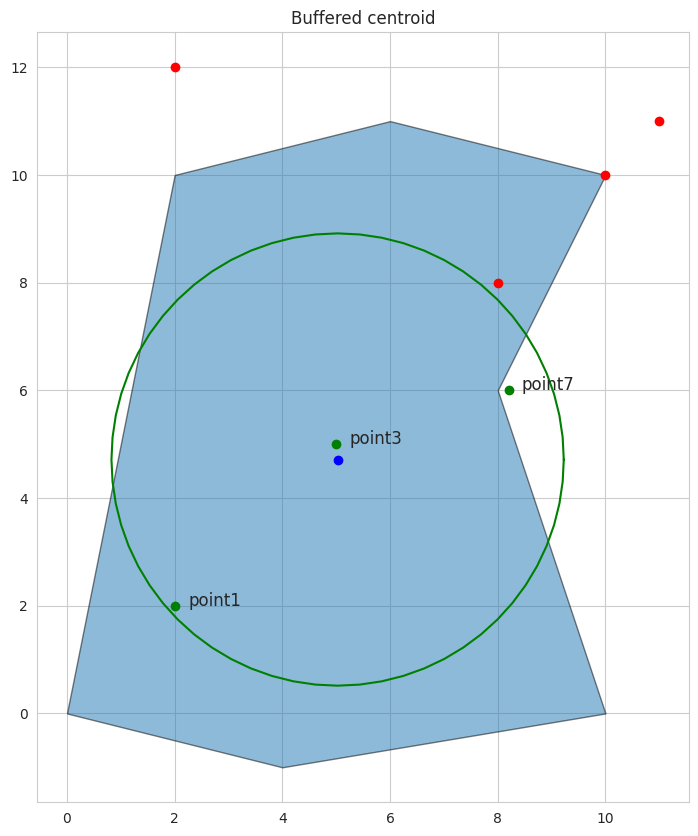

In [18]:
# What about points in a buffer of 4.2 units around the centroid
buffered = boundaries.centroid.buffer(4.2)
mask = points_gdf.within(buffered)
buffered_points = points_gdf[mask]
not_buffered_points = points_gdf[~mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
boundaries_gdf.centroid.plot(
    ax=ax,
    color='blue'
)
not_buffered_points.plot(
    ax=ax,
    color='red'
)
buffered_points.plot(
    ax=ax,
    color='green'
)
# display the name of the buffered points
for x, y, name in zip(buffered_points.geometry.x, buffered_points.geometry.y, buffered_points['name']):
    ax.text(x + .25, y, name, fontsize=12)

x, y = buffered.exterior.xy
plt.plot(x, y, color='green')

plt.title('Buffered centroid')
plt.show()

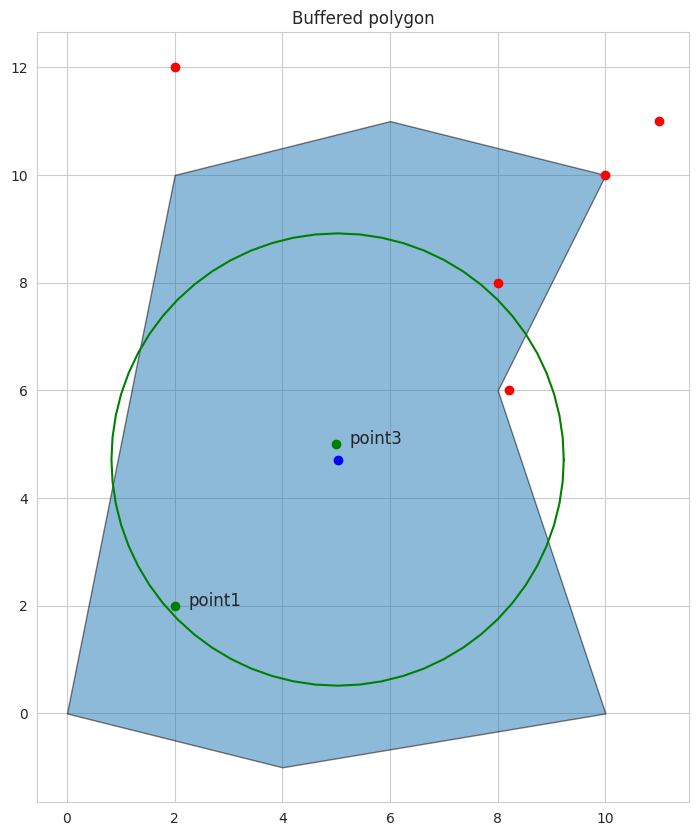

In [19]:
# Point 7 is not in the polygon but is in the buffer
# Remedy this by using the buffer of the polygon

# Create the buffer
buffered = boundaries.centroid.buffer(4.2)
# Get the points that are within the buffer
mask = points_gdf.within(buffered)
# And clip the points that are within the boundaries too
buffered_points = gpd.clip(points_gdf[mask], boundaries)

# Exclude the points that are not in the boundaries but not in buffer
not_buffered_points = gpd.clip(points_gdf[~mask], boundaries)
# Get the points that are not in the boundaries
not_in_boundaries = gpd.overlay(points_gdf, boundaries_gdf, how='difference')
# concat the two GeoDataFrames
excluded_points = gpd.GeoDataFrame(pd.concat([not_buffered_points, not_in_boundaries]))


fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
boundaries_gdf.centroid.plot(
    ax=ax,
    color='blue'
)
excluded_points.plot(
    ax=ax,
    color='red'
)
buffered_points.plot(
    ax=ax,
    color='green'
)
# display the name of the buffered points
for x, y, name in zip(buffered_points.geometry.x, buffered_points.geometry.y, buffered_points['name']):
    ax.text(x + .25, y, name, fontsize=12)
    
x, y = buffered.exterior.xy
plt.plot(x, y, color='green')

plt.title('Buffered polygon')
plt.show()
